In [1]:
# Importing the needed modules for this project
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.0 Project Problem Definition :  TITANIC SURVIVAL PREDICTION 

2.0 Preparing the Data 

2.1 Import the Dependency

2.2 Loading the Data

In [2]:
# load the dataset for this project
test_df = pd.read_csv("C:/Users/FASANXI SODIQ/codesoft project datasets/tested.csv ")
df_train = pd.read_csv("C:/Users/FASANXI SODIQ/codesoft project datasets/Titanic-Dataset.csv ")

In [3]:
test_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [4]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
test_df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
df_train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


2.3 Exploratory Analysis 

In [7]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


2.4 Cleaning the Data

In [11]:
# check for duplicate
df_train.duplicated().sum()

0

In [12]:
# check for duplicate
test_df.duplicated().sum()

0

In [13]:
# Checking for null value(s) or NAN value(s)
df_train.isnull().sum()

# there are 177 total NAN values in Age column or for feature Age.
# there are 2 NAN value in Embarked column.
# there are 687 total NAN values in Cabin column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Checking for null value(s) or NAN value(s)
test_df.isnull().sum()

# there are 86 total NAN values in Age column or for feature Age.
# there are 1 NAN value in Fare column.
# there are 327 total NAN values in Cabin column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
# Since there is a small numbers of NAN value for age column,
# I can't drop the column with NAN values rather replace them with either mean or median age value.
average_age_train = df_train.Age.mean()
median_age_train = df_train.Age.median()
# replace/fill NAN values with the median train age .
df_train['Age'] = df_train['Age'].fillna(median_age_train)
print("Average Train age =", np.round(average_age_train))
print("Median Train age =", median_age_train)

Average Train age = 30.0
Median Train age = 28.0


In [16]:
# Since there is a small numbers of NAN value for age column,
# I can't drop the column with NAN values rather replace them with either mean or median age value.
average_age_test = test_df.Age.mean()
median_age_test = test_df.Age.median()
# replace/fill NAN values with the median test age .
test_df['Age'] = test_df['Age'].fillna(median_age_test)
print("Average Test age =", np.round(average_age_test))
print("Median Test age =", median_age_test)

Average Test age = 30.0
Median Test age = 27.0


In [17]:
# replace train Fare NAN value with median value.
most_appear = 'S'
mostAppear_Embarked_train = df_train.Embarked.mode()
df_train['Embarked'] = df_train['Embarked'].fillna(most_appear)
df_train.Embarked.isnull().sum()

0

In [18]:
# replace train Fare NAN value with median value.
median_fare_test = test_df.Fare.median()
test_df['Fare'] = test_df['Fare'].fillna(median_fare_test)
test_df.Fare.isnull().sum()

0

In [19]:
# since majority of the data in Cabin column is Nan values, i will drop the Cabin column.
df_train = df_train.drop(['Cabin'], axis = 1)

In [20]:
# since majority of the data in Cabin column is Nan values, i will drop the Cabin column.
test_df = test_df.drop(['Cabin'], axis = 1)

In [21]:
# check for correlation between the training features.
df_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [22]:
# check for correlation between the testing features.
test_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.031447,0.003818,0.043080,0.008633
Survived,-0.023245,1.000000,-0.108615,0.008035,0.099943,0.159120,0.192036
Pclass,-0.026751,-0.108615,1.000000,-0.467853,0.001087,0.018721,-0.577313
Age,-0.031447,0.008035,-0.467853,1.000000,-0.071197,-0.043731,0.342357
SibSp,0.003818,0.099943,0.001087,-0.071197,1.000000,0.306895,0.171912
Parch,0.043080,0.159120,0.018721,-0.043731,0.306895,1.000000,0.230325
Fare,0.008633,0.192036,-0.577313,0.342357,0.171912,0.230325,1.000000


Text(0.5, 1.0, 'Train Correlation Matrix')

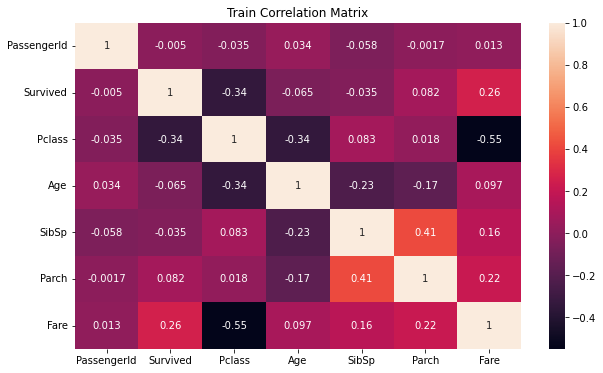

In [23]:
# plot the correlation matrix.
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df_train.corr(), annot=True)
plt.title('Train Correlation Matrix')

Text(0.5, 1.0, 'Test Correlation Matrix')

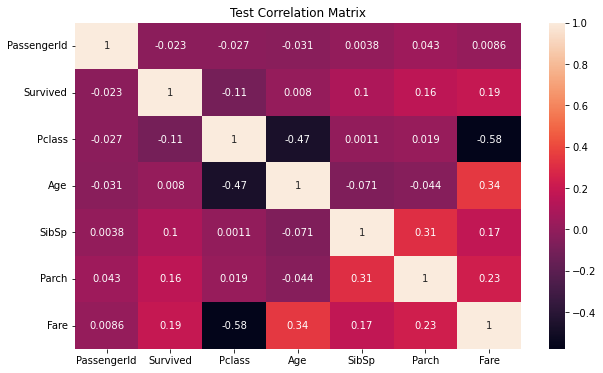

In [24]:
# plot the correlation matrix.
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(test_df.corr(), annot=True)
plt.title('Test Correlation Matrix')

2.5 Features Engineering 

Features Transformation 

In [25]:
# transform categorical variable 'Sex' and 'Embarked'
from sklearn.preprocessing import OrdinalEncoder
sex_column1 = df_train[["Sex"]]
Embarked_column1 = df_train[["Embarked"]]
encoder1 = OrdinalEncoder()
encoded_sex1 = encoder1.fit_transform(sex_column1)
encoded_embarked1 = encoder1.fit_transform(Embarked_column1)
df_train['Sex'] = encoded_sex1
df_train['Embarked'] = encoded_embarked1

In [26]:
# transform categorical variable 'Sex' and 'Embarked'
from sklearn.preprocessing import OrdinalEncoder
sex_column2 = test_df[["Sex"]]
Embarked_column2 = test_df[["Embarked"]]
encoder2 = OrdinalEncoder()
encoded_sex2 = encoder2.fit_transform(sex_column2)
encoded_embarked2 = encoder2.fit_transform(Embarked_column2)
test_df['Sex'] = encoded_sex2 
test_df['Embarked'] = encoded_embarked2

In [27]:
# create family column.
df_train['Family'] = df_train['SibSp'] + df_train['Parch']

In [28]:
# select the features that best fit the target variable (Survived) for the training data.
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X1 = df_train.drop(['Survived','Name', 'Ticket', 'PassengerId'], axis = 1)
y1 = df_train['Survived']
test = SelectKBest(score_func=chi2, k=7)
fit = test.fit(X1,y1)
print(fit.scores_)

features = fit.transform(X1)
print(features[:5,:])

# the first six features that best fit the traget variable are in ranking order;
# [Sex, Age, Parch, Fare, Embarked, Pclass]

[3.08736994e+01 9.27024470e+01 2.16491630e+01 2.58186538e+00
 1.00974991e+01 4.51831909e+03 1.02025247e+01 7.09091328e-01]
[[ 3.      1.     22.      1.      0.      7.25    2.    ]
 [ 1.      0.     38.      1.      0.     71.2833  0.    ]
 [ 3.      0.     26.      0.      0.      7.925   2.    ]
 [ 1.      0.     35.      1.      0.     53.1     2.    ]
 [ 3.      1.     35.      0.      0.      8.05    2.    ]]


In [29]:
X1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,3,1.0,22.0,1,0,7.2500,2.0,1
1,1,0.0,38.0,1,0,71.2833,0.0,1
2,3,0.0,26.0,0,0,7.9250,2.0,0
3,1,0.0,35.0,1,0,53.1000,2.0,1
4,3,1.0,35.0,0,0,8.0500,2.0,0


In [30]:
# split the scaled data into train_set and test_set
# since Name, Ticket, PassengerId contribute less to the probability of surviving.
X_eng = df_train.drop(['Survived','Name', 'Ticket', 'PassengerId','Family'], axis = 1)
X_train = df_train.drop(['Survived','Name', 'Ticket', 'PassengerId','Family'], axis = 1)
Y_train = df_train['Survived']
Y_test = test_df['Survived']
X_test = test_df.drop(['Survived','Name', 'Ticket', 'PassengerId'], axis = 1).copy()
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("Y_test :",Y_test.shape)
print("Y_train :",Y_train.shape)
print("X_eng :",X_eng.shape)

X_train : (891, 7)
X_test : (418, 7)
Y_test : (418,)
Y_train : (891,)
X_eng : (891, 7)


In [31]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,13.0000,2.0
887,1,0.0,19.0,0,0,30.0000,2.0
888,3,0.0,28.0,1,2,23.4500,2.0
889,1,1.0,26.0,0,0,30.0000,0.0


2.6 Models Building

In [32]:
# import model dependency.
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import mean, absolute, sqrt
from sklearn.svm import SVC

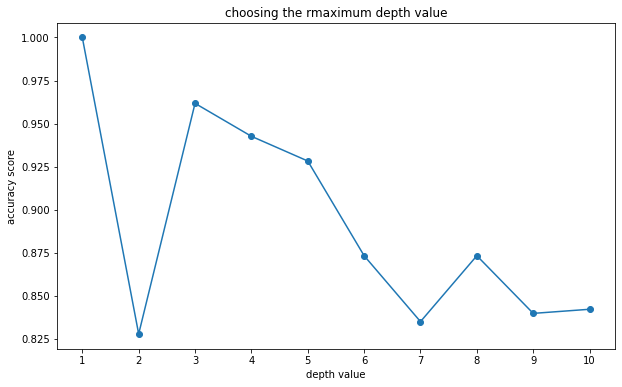

In [33]:
# select the maximum depth value

max_depth = [ ]
acc_scores = [ ]
cols = ['depth_val', 'acc_scores'] 
for d in range(1,11):
    dt_model = DecisionTreeClassifier(criterion ="entropy",  max_depth = d, random_state=42)
    dt_model.fit(X_train,Y_train)
    ypred_dt = dt_model.predict(X_test)
    max_depth.append(d)
    acc_scores.append(accuracy_score(Y_test, ypred_dt))
dt_df = pd.DataFrame(list(zip(max_depth,acc_scores)), columns = cols)


# visualise the max depth valus
plt.figure(figsize=(10,6))
plt.plot(range(1,11), acc_scores, marker = "o")
plt.xlabel("depth value")
plt.ylabel("accuracy score")
plt.title("choosing the rmaximum depth value")
plt.xticks(range(1,11))
plt.show()

# maximum depth value with highest accuracy score is 1



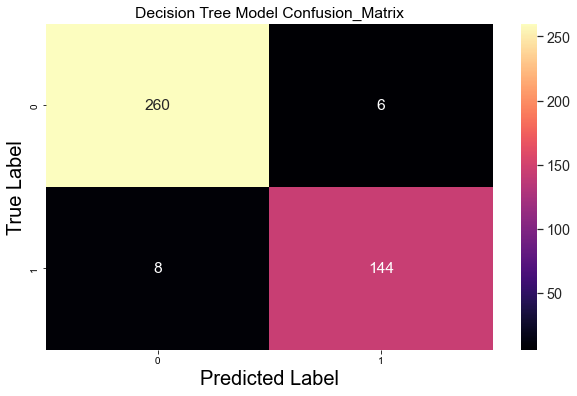

<Figure size 288x144 with 0 Axes>

In [34]:
# build the decision 
dt_model = DecisionTreeClassifier( max_depth = 3, random_state=42)
dt_model.fit(X_train, Y_train)
ypred_dt = dt_model.predict(X_test)
dtree_accuracy = round(accuracy_score(Y_test,ypred_dt)*100, 2)
dtree_precision = round(precision_score(Y_test,ypred_dt)*100, 2)
dtree_recall = round(recall_score(Y_test,ypred_dt)*100, 2)
dtree_f1_score = round(f1_score(Y_test,ypred_dt)*100, 2)



dt_confusion_matrix = confusion_matrix(Y_test, ypred_dt)
dt_cm_df = pd.DataFrame(dt_confusion_matrix)
# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(4,2))
sns.heatmap(dt_cm_df, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Decision Tree Model Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

Random Forest Model : 

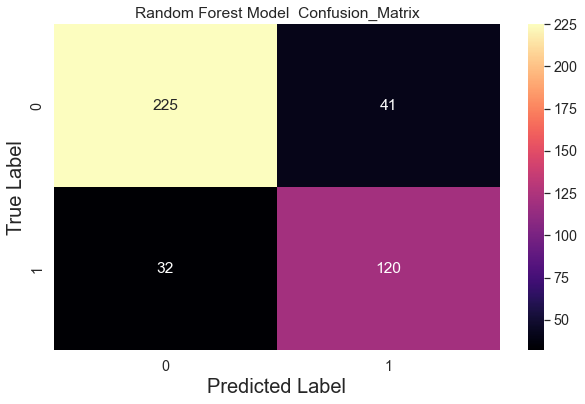

<Figure size 288x144 with 0 Axes>

In [35]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,Y_train)
ypred_rf = rf_model.predict(X_test)
rf_accuracy = round(accuracy_score(Y_test,ypred_rf)*100, 2)
rf_precision = round(precision_score(Y_test,ypred_rf)*100, 2)
rf_recall = round(recall_score(Y_test,ypred_rf)*100, 2)
rf_f1_score = round(f1_score(Y_test,ypred_rf)*100, 2)

rf_confusion_matrix = confusion_matrix(Y_test, ypred_rf)
rf_cm_df = pd.DataFrame(rf_confusion_matrix)


# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(4,2))
sns.heatmap(rf_cm_df, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Random Forest Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

Support Vector Machine Model:

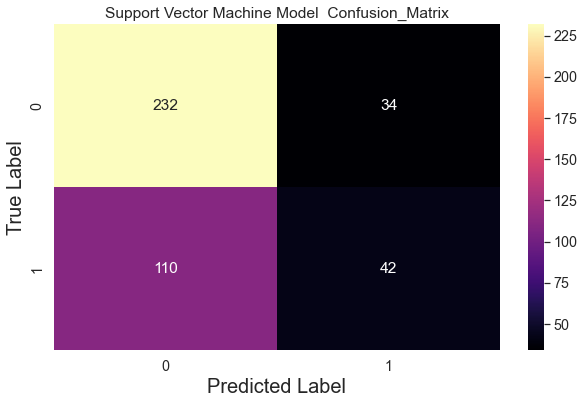

<Figure size 288x144 with 0 Axes>

In [40]:
svm_model = SVC()
svm_model.fit(X_train,Y_train)
ypred_svm = svm_model.predict(X_test)
svm_accuracy = round(accuracy_score(Y_test,ypred_svm)*100, 2)
svm_precision = round(precision_score(Y_test,ypred_svm)*100, 2)
svm_recall = round(recall_score(Y_test,ypred_svm)*100, 2)
svm_f1_score = round(f1_score(Y_test,ypred_svm)*100, 2)

svm_confusion_matrix = confusion_matrix(Y_test, ypred_svm)
svm_cm_df = pd.DataFrame(svm_confusion_matrix)


# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(4,2))
sns.heatmap(svm_cm_df, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Support Vector Machine Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

KNN Model : 
    
   

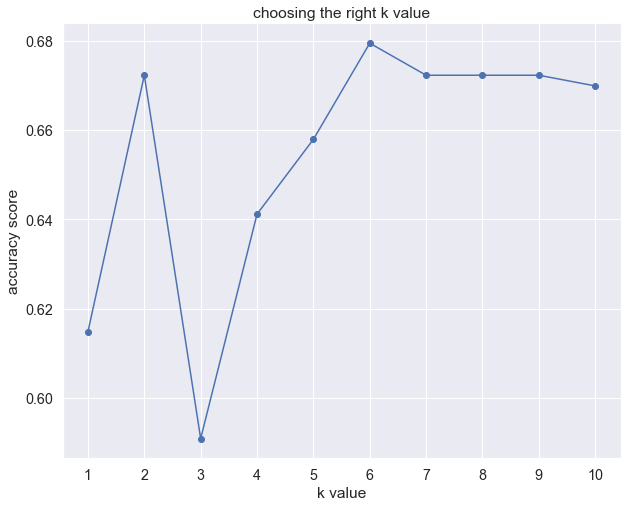

In [42]:
# select the right k value

k_values = [ ]
accuracy_scores = [ ]
cols = ['k_val', 'acc_scores'] 
for n in range(1,11):
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train,Y_train)
    ypred_knn = knn_model.predict(X_test)
    k_values.append(n)
    accuracy_scores.append(accuracy_score(Y_test, ypred_knn))
knn_df = pd.DataFrame(list(zip(k_values,accuracy_scores)), columns = cols)


# visualise the k valus
plt.figure(figsize=(10,8))
plt.plot(range(1,11), accuracy_scores, marker = "o")
plt.xlabel("k value")
plt.ylabel("accuracy score")
plt.title("choosing the right k value")
plt.xticks(range(1,11))
plt.show()

# k value with highest accuracy score is 6



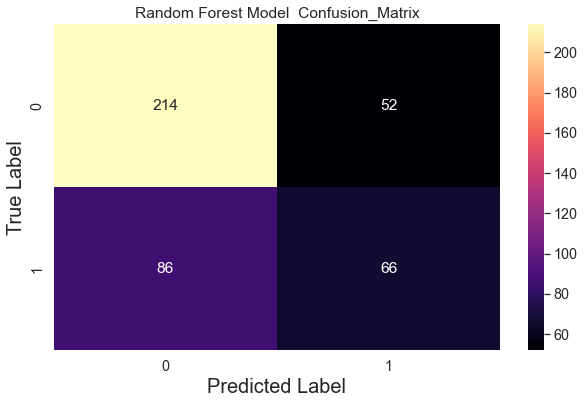

<Figure size 288x144 with 0 Axes>

In [39]:
# build k-nearest neigbor algorithm/model. 
knn_model = KNeighborsClassifier(n_neighbors=n)
knn_model.fit(X_train,Y_train)
ypred_knn = knn_model.predict(X_test)
knn_accuracy = round(accuracy_score(Y_test, ypred_knn)*100, 2)
knn_precision = round(precision_score(Y_test, ypred_knn)*100, 2)
knn_recall = round(recall_score(Y_test, ypred_knn)*100, 2)
knn_f1_score = round(f1_score(Y_test, ypred_knn)*100, 2)

knn_confusion_matrix = confusion_matrix(Y_test, ypred_knn)
knn_cm_df = pd.DataFrame(knn_confusion_matrix)


# plot the confusion_matrix
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(4,2))
sns.heatmap(knn_cm_df, annot=True, fmt='g', ax=ax, cmap="magma")
ax.set_title('Random Forest Model  Confusion_Matrix')
ax.set_xlabel("Predicted Label", fontsize=20)
ax.set_ylabel("True Label", fontsize=20)
plt.show()

3.0 Model Evaluation : 

In [43]:
columnName = ['Accuracy Score', 'Precission Score', 'Recall Score', 'F1 Score']
idx = ['knn', 'dtree', 'rf', 'svm']
svm_metrics = [svm_accuracy, svm_precision, svm_recall, svm_f1_score]
dtree_metrics = [dtree_accuracy, dtree_precision, dtree_recall, dtree_f1_score]
rf_metrics = [rf_accuracy, rf_precision, rf_recall, rf_f1_score]
knn_metrics = [knn_accuracy, knn_precision, knn_recall, knn_f1_score]
models_metric = [knn_metrics,dtree_metrics,rf_metrics, svm_metrics]
metrics = pd.DataFrame(models_metric, columns = columnName, index = idx)
metrics.sort_values(by=['F1 Score'], ascending=False)

,Accuracy Score,Precission Score,Recall Score,F1 Score
dtree,96.65,96.00,94.74,95.36
rf,82.54,74.53,78.95,76.68
knn,66.99,55.93,43.42,48.89
svm,65.55,55.26,27.63,36.84


4.0 Model Finalization/Recommendation 

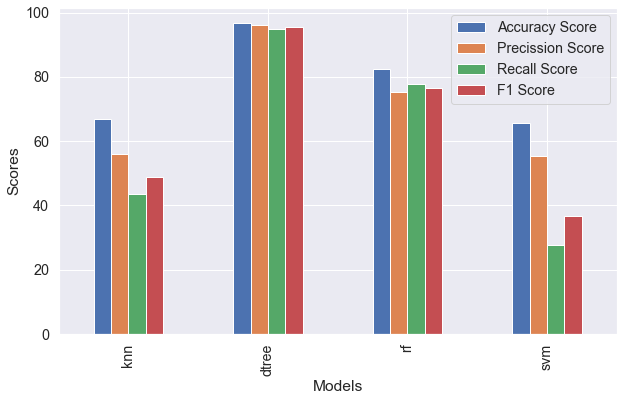

In [732]:
# display of metrics for each model
metrics.plot(kind="bar")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.legend()
plt.show()

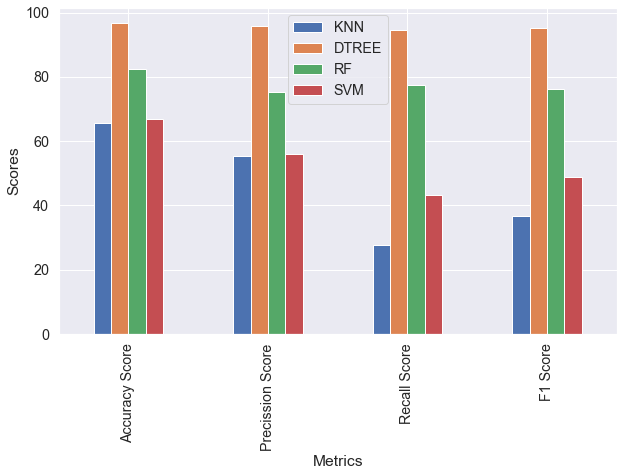

In [731]:
# comparing the individual metrics for each model.
accuracy_metrics =[svm_accuracy,dtree_accuracy,rf_accuracy,knn_accuracy]
precision_metrics =[svm_precision,dtree_precision,rf_precision, knn_precision]
recall_metrics = [svm_recall,dtree_recall,rf_recall,knn_recall]
f1_score_metrics = [svm_f1_score,dtree_f1_score,rf_f1_score,knn_f1_score]
envaluator = [accuracy_metrics, precision_metrics, recall_metrics ,f1_score_metrics]
label = ['KNN', 'DTREE', 'RF', 'SVM']
columnName = ['Accuracy Score', 'Precission Score', 'Recall Score', 'F1 Score']
metric = pd.DataFrame(envaluator, columns = label, index = columnName)

metric.plot(kind="bar")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.legend()
plt.show()